In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [5]:
# Check for missing values
missing_customers = customers_df.isnull().sum()
missing_products = products_df.isnull().sum()
missing_transactions = transactions_df.isnull().sum()

In [6]:
# Summary statistics
customers_summary = customers_df.describe(include="all")
products_summary = products_df.describe(include="all")
transactions_summary = transactions_df.describe(include="all")

In [7]:
# Merge datasets
transactions_full = transactions_df.merge(customers_df, on="CustomerID").merge(products_df, on="ProductID")

## Analysis & Visualizations

/var/folders/4v/3lv75l3d25x8_bjvlbf1h57m0000gn/T/ipykernel_61404/2410882661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


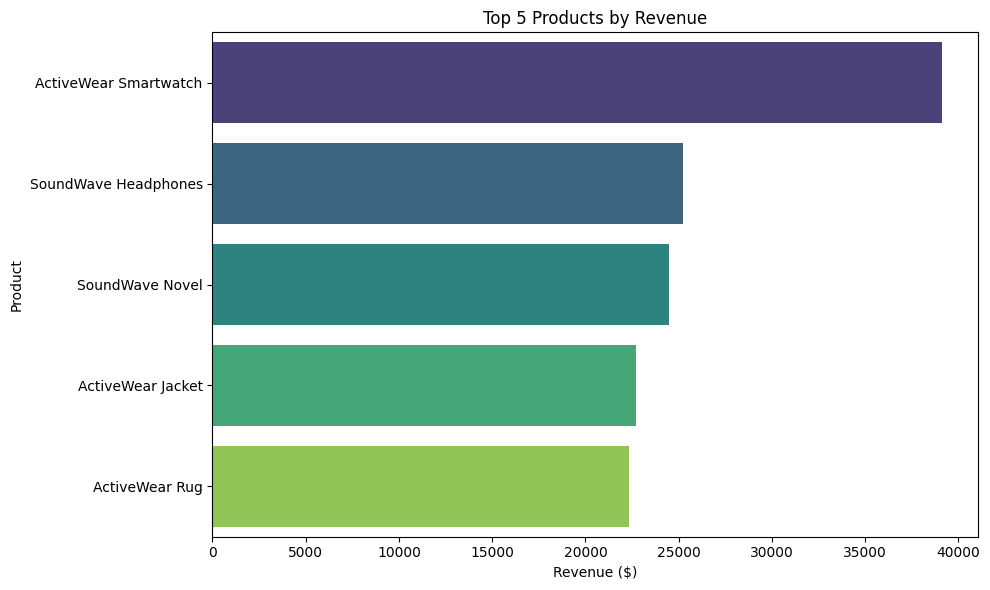

In [8]:
# 1. Top Products by Revenue
top_products = transactions_full.groupby("ProductName")["TotalValue"].sum().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

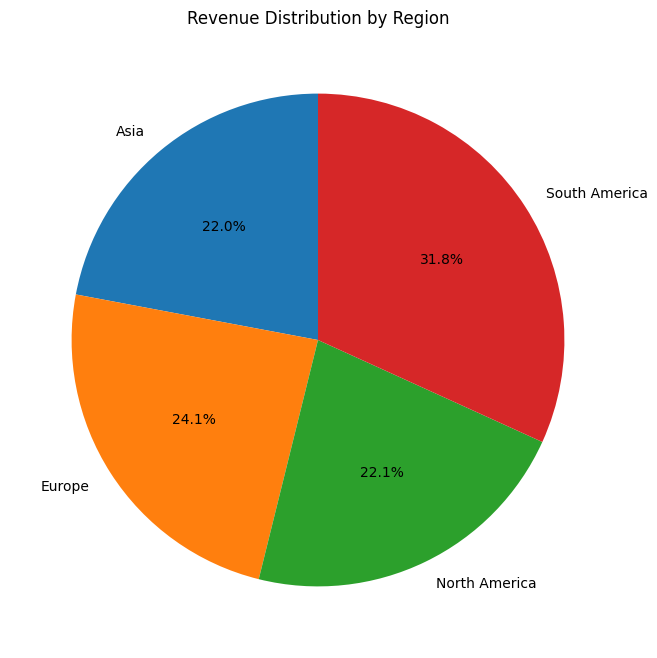

In [9]:
# 2. Regional Revenue Analysis
region_revenue = transactions_full.groupby("Region")["TotalValue"].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_revenue, labels=region_revenue.index, autopct="%1.1f%%", startangle=90)
plt.title("Revenue Distribution by Region")
plt.show()

In [10]:
# 3. Customer vs Revenue Distribution
region_stats = transactions_full.groupby("Region").agg(
    TotalCustomers=("CustomerID", "nunique"),
    TotalRevenue=("TotalValue", "sum")
).reset_index()

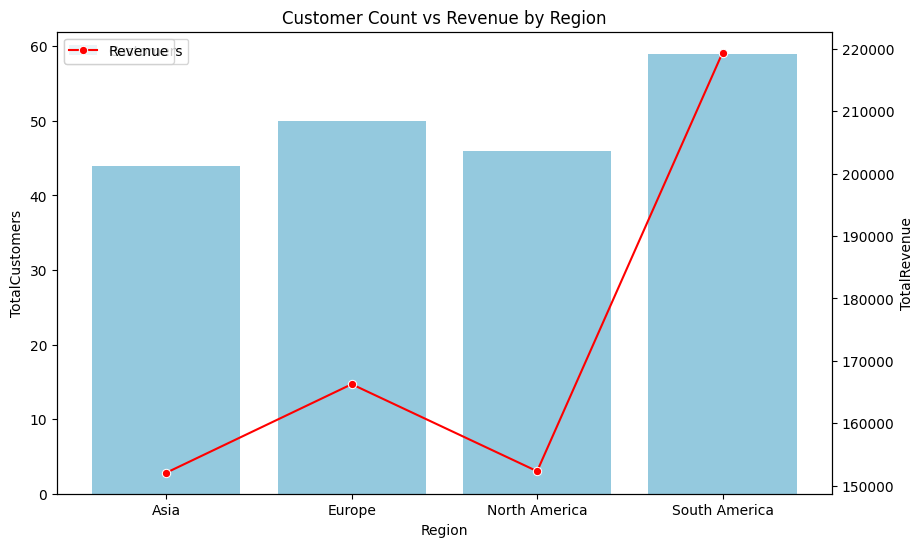

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x="Region", y="TotalCustomers", data=region_stats, ax=ax1, color="skyblue", label="Customers")
ax2 = ax1.twinx()
sns.lineplot(x="Region", y="TotalRevenue", data=region_stats, ax=ax2, color="red", marker="o", label="Revenue")
ax1.set_title("Customer Count vs Revenue by Region")
plt.show()

/var/folders/4v/3lv75l3d25x8_bjvlbf1h57m0000gn/T/ipykernel_61404/4062994379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="rocket")


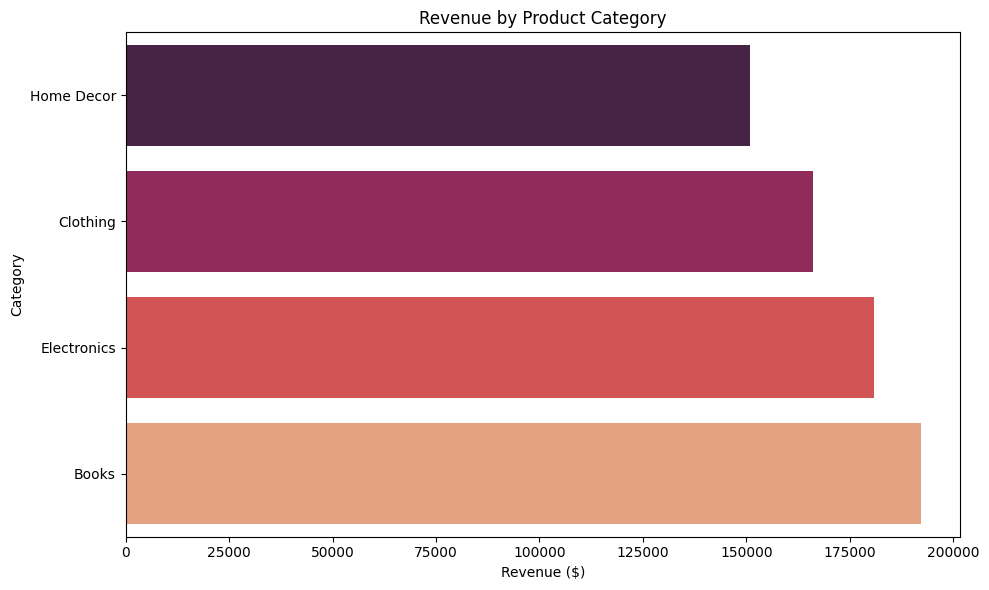

In [12]:
# 4. Category Revenue Analysis
category_revenue = transactions_full.groupby("Category")["TotalValue"].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="rocket")
plt.title("Revenue by Product Category")
plt.xlabel("Revenue ($)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [13]:
# 5. Monthly Revenue Trend (Added TransactionDate handling)
transactions_full["TransactionDate"] = pd.to_datetime(transactions_full["TransactionDate"])
transactions_full["Month"] = transactions_full["TransactionDate"].dt.to_period("M")
monthly_revenue = transactions_full.groupby("Month")["TotalValue"].sum().reset_index()
monthly_revenue["Month"] = monthly_revenue["Month"].dt.strftime("%Y-%m")

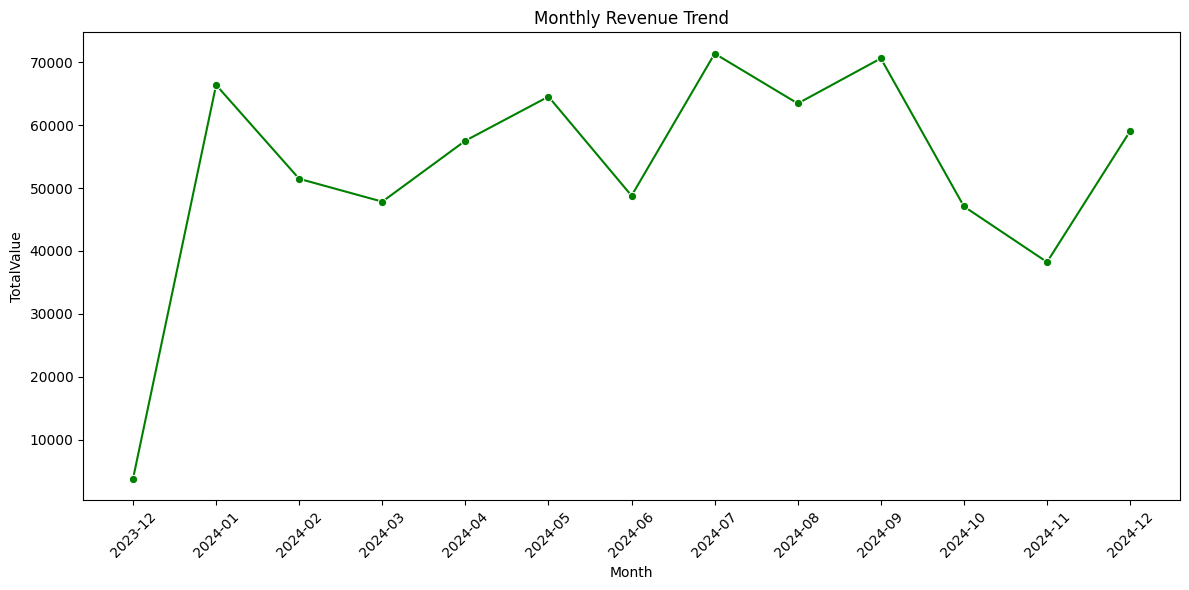

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="TotalValue", data=monthly_revenue, marker="o", color="green")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# 6. High-Value Customers Analysis (Using CustomerID instead of Name)
top_customers = transactions_full.groupby("CustomerID").agg(
    TotalSpending=("TotalValue", "sum"),
    PurchaseFrequency=("TransactionID", "count")
).nlargest(5, "TotalSpending")

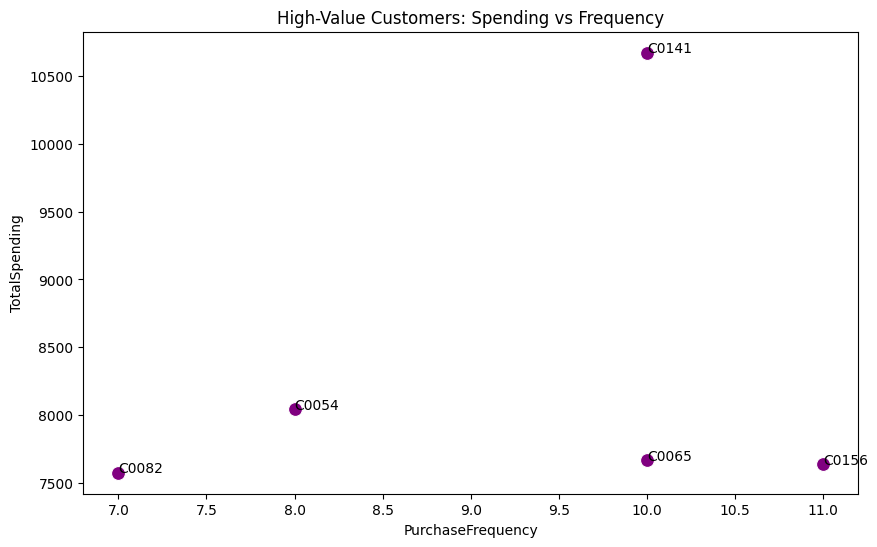

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PurchaseFrequency", y="TotalSpending", data=top_customers, s=100, color="purple")
plt.title("High-Value Customers: Spending vs Frequency")
for _, row in top_customers.iterrows():
    plt.text(row["PurchaseFrequency"], row["TotalSpending"], row.name)
plt.show()

## Results

In [17]:
print("\nMissing Values Analysis:")
print("Customers Dataset:\n", missing_customers)
print("\nProducts Dataset:\n", missing_products)
print("\nTransactions Dataset:\n", missing_transactions)


Missing Values Analysis:
Customers Dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions Dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [18]:
print("\nTop Performance Metrics:")
print("\nTop Products by Revenue:\n", top_products)
print("\nTop Regions by Revenue:\n", region_revenue)
print("\nCustomer Distribution by Region:\n", customers_df["Region"].value_counts())
print("\nRevenue by Category:\n", category_revenue)
print("\nTop Customers by Spending:\n", top_customers[["TotalSpending"]])


Top Performance Metrics:

Top Products by Revenue:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64

Top Regions by Revenue:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

Customer Distribution by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Revenue by Category:
 Category
Home Decor     150893.93
Clothing       166170.66
Electronics    180783.50
Books          192147.47
Name: TotalValue, dtype: float64

Top Customers by Spending:
             TotalSpending
CustomerID               
C0141            10673.87
C0054             8040.39
C0065             7663.70
C0156             7634.45
C0082             7572.91
